<a href="https://colab.research.google.com/github/vinayjoshva/ISA-material/blob/main/ICP2_16352584.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ICP-Data Integration and Visulaization Summary**
1) Importing libraries

2) Reading Covid Data sets

3) Data filtering

4) Data Integration using merge(), join() and concatenate

5) Data visualization using matplot lib, pandas and seaborn (pie chart, line chart, heatmaps etc).



In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import seaborn as sns


In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_cumulative.csv')
df1 = pd.read_csv('https://raw.githubusercontent.com/M3IT/COVID-19_Data/master/Data/COVID_AU_national.csv')

In [26]:
print(df.shape)
print(df1.shape)

(11592, 18)
(1288, 19)


In [27]:
df

,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines,people_vaccinated,people_fully_vaccinated,population,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,id
0,2020-01-25,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
1,2020-01-26,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
2,2020-01-27,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
3,2020-01-28,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
4,2020-01-29,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,25459470,1,Australia,NaN,NaN,99999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11587,2023-08-04,1725730,2954,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,5115451,2,Australia,Queensland,NaN,36068882
11588,2023-08-04,932940,1548,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1756494,2,Australia,South Australia,NaN,165128d0
11589,2023-08-04,302852,277,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,535500,2,Australia,Tasmania,NaN,86525f8e
11590,2023-08-04,2978839,7454,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,6629870,2,Australia,Victoria,NaN,6c5dccdb


In [28]:
df1

,date,confirmed,confirmed_cum,deaths,deaths_cum,tests,tests_cum,positives,positives_cum,recovered,recovered_cum,hosp,hosp_cum,icu,icu_cum,vent,vent_cum,vaccines,vaccines_cum
0,2020-01-25,4,4,0,0,NaN,0.0,4,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1,2020-01-26,0,4,0,0,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
2,2020-01-27,1,5,0,0,NaN,0.0,1,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
3,2020-01-28,0,5,0,0,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
4,2020-01-29,4,9,0,0,NaN,0.0,4,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-07-31,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1284,2023-08-01,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1285,2023-08-02,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0
1286,2023-08-03,0,11731441,0,19999,NaN,0.0,0,0.0,NaN,0.0,0,0.0,0,0.0,0,0.0,0,0


Lets remove all the non-cumulative columns from the df 1 data frame

In [29]:
df_filtered=df1.drop(['confirmed','deaths','tests','positives','recovered','hosp', 'icu','vent'], axis=1)
df_filtered

,date,confirmed_cum,deaths_cum,tests_cum,positives_cum,recovered_cum,hosp_cum,icu_cum,vent_cum,vaccines,vaccines_cum
0,2020-01-25,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2020-01-26,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2020-01-27,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2020-01-28,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2020-01-29,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1283,2023-07-31,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1284,2023-08-01,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1285,2023-08-02,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1286,2023-08-03,11731441,19999,0.0,0.0,0.0,0.0,0.0,0.0,0,0


** Data Integration**

Pandas merge(): Combining Data on Common Columns or Indices.
The first technique you’ll learn is merge(). You can use merge() any time you want to do database-like join operations. It’s the most flexible joining operation (the other are join() and concat()).

How to merge()

Before getting into the details of how to use merge(), you should first understand the various forms of joins:

>inner

>outer

>left

>right

Outer Join

Here, you’ll specify an outer join with the how parameter. Remember from the diagrams below that in an outer join (also known as a full outer join), all rows from both DataFrames will be present in the new DataFrame.

If a row doesn’t have a match in the other DataFrame (based on the key column[s]), then you won’t lose the row like you would with an inner join. Instead, the row will be in the merged DataFrame with NaN values filled in where appropriate.


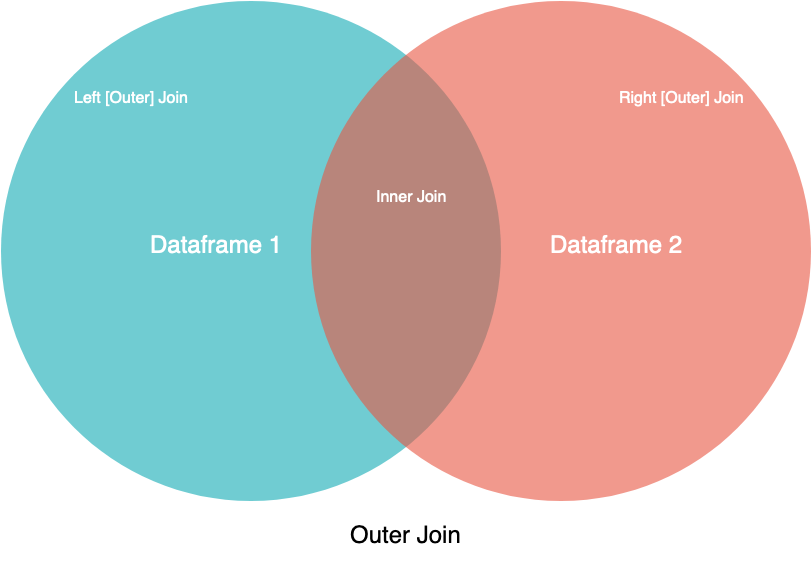




In [30]:
outer_merged = pd.merge(df, df_filtered, how="outer", on=["date"])
outer_merged.head()


,date,confirmed,deaths,tests,positives,recovered,hosp,icu,vent,vaccines_x,...,confirmed_cum,deaths_cum,tests_cum,positives_cum,recovered_cum,hosp_cum,icu_cum,vent_cum,vaccines_y,vaccines_cum
0,2020-01-25,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2020-01-25,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2020-01-25,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [31]:
outer_merged.shape

(11592, 28)

Concatenating objects:

The concat() function (in the main pandas namespace) does all of the heavy lifting of performing concatenation operations along an axis while performing optional set logic (union or intersection) of the indexes (if any) on the other axes. Note that I say “if any” because there is only a single possible axis of concatenation for Series.

Before diving into all of the details of concat and what it can do, here is a simple example:

source : [link text](https://pandas.pydata.org/docs/user_guide/merging.html)

In [32]:
df1_a = pd.DataFrame(
       { "A": ["A0", "A1", "A2", "A3"],
            "B": ["B0", "B1", "B2", "B3"],
            "C": ["C0", "C1", "C2", "C3"],
            "D": ["D0", "D1", "D2", "D3"],
        },
        index=[0, 1, 2, 3],
 )

df2_a = pd.DataFrame(
    {
           "A": ["A4", "A5", "A6", "A7"],
            "B": ["B4", "B5", "B6", "B7"],
            "C": ["C4", "C5", "C6", "C7"],
            "D": ["D4", "D5", "D6", "D7"],
       },
        index=[4, 5, 6, 7],
    )


df3_a = pd.DataFrame(
       {
            "A": ["A8", "A9", "A10", "A11"],
            "B": ["B8", "B9", "B10", "B11"],
            "C": ["C8", "C9", "C10", "C11"],
            "D": ["D8", "D9", "D10", "D11"],
       },
        index=[8, 9, 10, 11],
    )


frames = [df1_a, df2_a, df3_a]
# row wise concat
result = pd.concat(frames)

In [33]:
df1_a

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [34]:
df2_a

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [35]:
df3_a

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


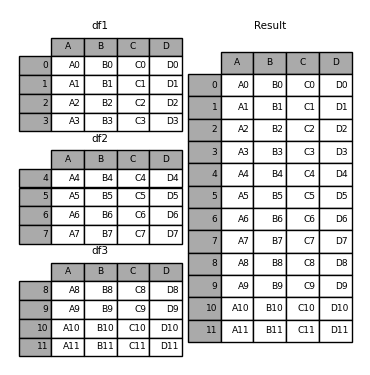

In [36]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [37]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")
s2 = pd.Series(["_0", "_1", "_2", "_3"])
#column wise concat
result = pd.concat([df1_a, s1, s2], axis=1)

In [38]:
s1

,X
0,X0
1,X1
2,X2
3,X3


In [39]:
s2

,0
0,_0
1,_1
2,_2
3,_3


In [40]:
result

,A,B,C,D,X,0
0,A0,B0,C0,D0,X0,_0
1,A1,B1,C1,D1,X1,_1
2,A2,B2,C2,D2,X2,_2
3,A3,B3,C3,D3,X3,_3


**Data Visulaization**

We’ll be using data from  Github repository that auto-updates the data daily. We’ll load our data into a Pandas’ dataframe based on the URL so that it’ll update automatically for us every day.

In [41]:
df_global = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
df_global

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


we read in the data into a dataframe df_global, and then select only the countries in our list countries. Selecting the data makes the resulting visualization a little more readable.

we create a summary column that aggregates the total number of cases across our confirmed cases, recovered cases, and any individuals who have died as a result of COVID-19.

In [42]:
countries = ['Brazil', 'Germany', 'United Kingdom', 'US', 'Italy', 'China']
df_regional = df_global[df_global['Country'].isin(countries)]

# Creating a Summary Column
df_regional['Cases'] = df_regional[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

<ipython-input-42-6b9eee60b56f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
df_regional

,Date,Country,Confirmed,Recovered,Deaths,Cases
19584,2020-01-22,Brazil,0,0,0,0
19585,2020-01-23,Brazil,0,0,0,0
19586,2020-01-24,Brazil,0,0,0,0
19587,2020-01-25,Brazil,0,0,0,0
19588,2020-01-26,Brazil,0,0,0,0
...,...,...,...,...,...,...
153403,2022-04-12,United Kingdom,21846115,0,171004,22017119
153404,2022-04-13,United Kingdom,21883579,0,171662,22055241
153405,2022-04-14,United Kingdom,21916961,0,172014,22088975
153406,2022-04-15,United Kingdom,21916961,0,172014,22088975


Now that we have our data stored within a dataframe, let’s prepare another dataframe that will hold our data in crosstabs, which will allow us to more easily visualize the data.
we pivot our dataframe df_regional, creating columns out of countries, with the number of cases as the data fields. This new dataframe is called covid. We then set the index of the dataframe to be the date and assign the country names to column headers.

In [44]:
#  Restructuring our Data
df_regional = df_regional.pivot(index='Date', columns='Country', values='Cases')
countries = list(df_regional.columns)
print(countries)
df_regional

['Brazil', 'China', 'Germany', 'Italy', 'US', 'United Kingdom']


Country,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


In [45]:
covid = df_regional.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
covid

,Brazil,China,Germany,Italy,US,United Kingdom
Date,,,,,,
2020-01-22,0,593,0,0,1,0
2020-01-23,0,691,0,0,1,0
2020-01-24,0,982,0,0,2,0
2020-01-25,0,1487,0,0,2,0
2020-01-26,0,2180,0,0,5,0
...,...,...,...,...,...,...
2022-04-12,30846027,1669001,23149457,15565841,81464184,22017119
2022-04-13,30872838,1695023,23315135,15628582,81506332,22055241
2022-04-14,30896067,1718871,23472211,15694348,81561653,22088975


In [46]:
covid.shape[1]

6

lets use some basic matplotlib for visualization

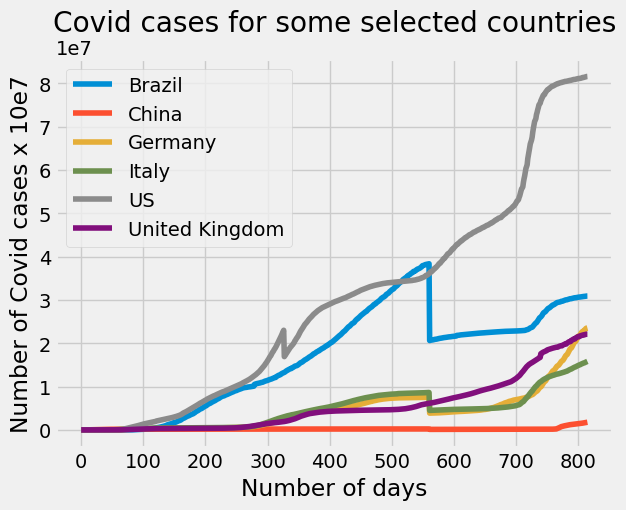

In [47]:
# get columns to plot
columns = covid.columns
# create x data
x_data = range(0, covid.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, covid[column], label=column)
# set title and legend
ax.set_title('Covid cases for some selected countries')
ax.set_xlabel('Number of days')
ax.set_ylabel('Number of Covid cases x 10e7')
ax.legend()

we can also use pandas plot.hist function to plot histograms

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

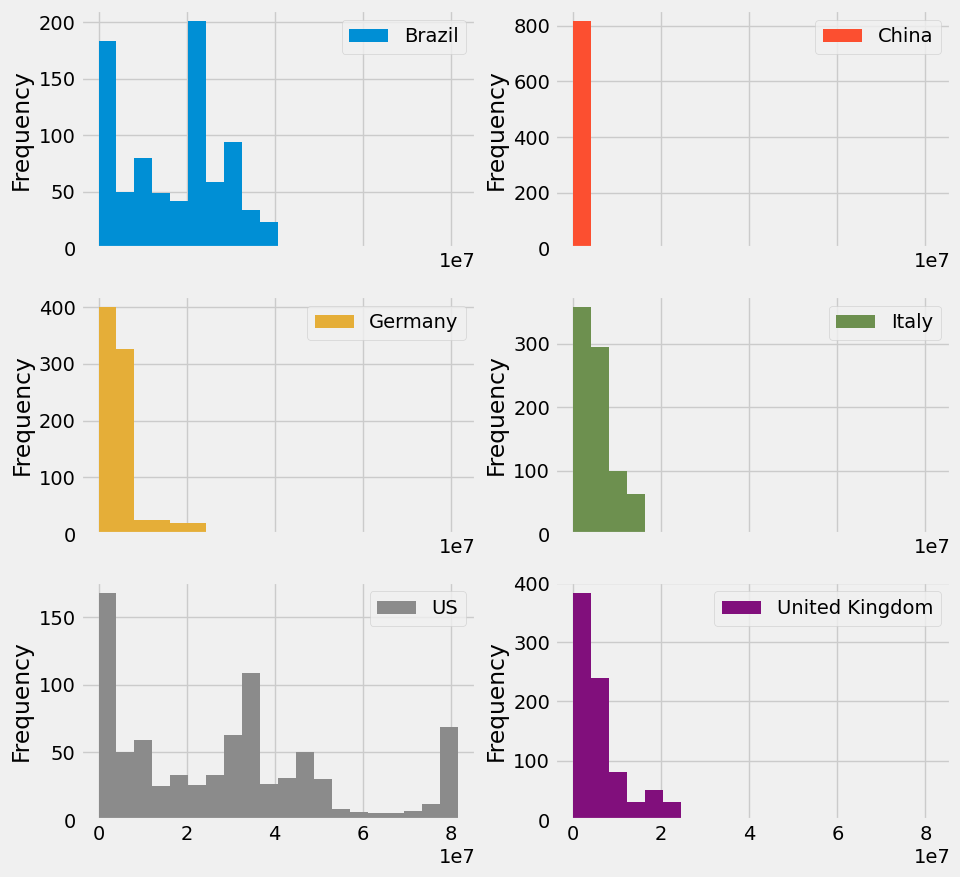

In [48]:
covid.plot.hist(subplots=True, layout=(3,2), figsize=(10, 10), bins=20)

We can use seaborn lineplot to creating a viuslaization for this data

---



<Axes: xlabel='Date'>

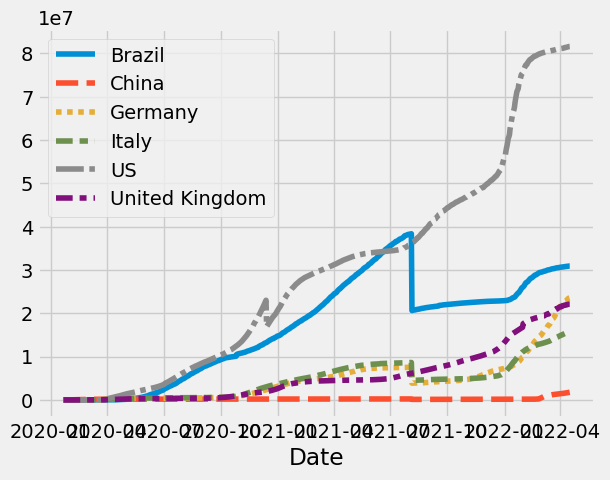

In [49]:
sns.lineplot(data=covid)

One of the very important visualization is correlation matrix. Below is the seaborn heatmap that shows correlation matrix

Pie Chart:

We’ll be plotting the cases Pie Chart to understand the how many cases are  in Germany, Italy and US as of 3/11/2021. So we have created list slices based on which our Pie Chart will be divided and the corresponding activities are it’s values (in this cases countaries and the number of cases).

To plot a Pie Chart we call ‘.pie’ function which takes x values which is ‘slices’ over here based on it the pie is divided followed by labels which have the corresponding string the values it represents. These string values can be altered by ‘textprops’. To change the radius or size of Pie we call ‘radius’. For the aesthetics we call ‘shadow’ as True and ‘startangle ’= 90. We can define colors to assign by passing a list of corresponding colors. To space out each piece of Pie we can pass on the list of corresponding values to ‘explode’. The ‘autopct’ defines the number of positions that are allowed to be shown. In this case, autopct allows 2 positions before and after the decimal place

Text(0.5, 1.0, 'Total number of cases as of 03/12/2021\n\n\n\n\n')

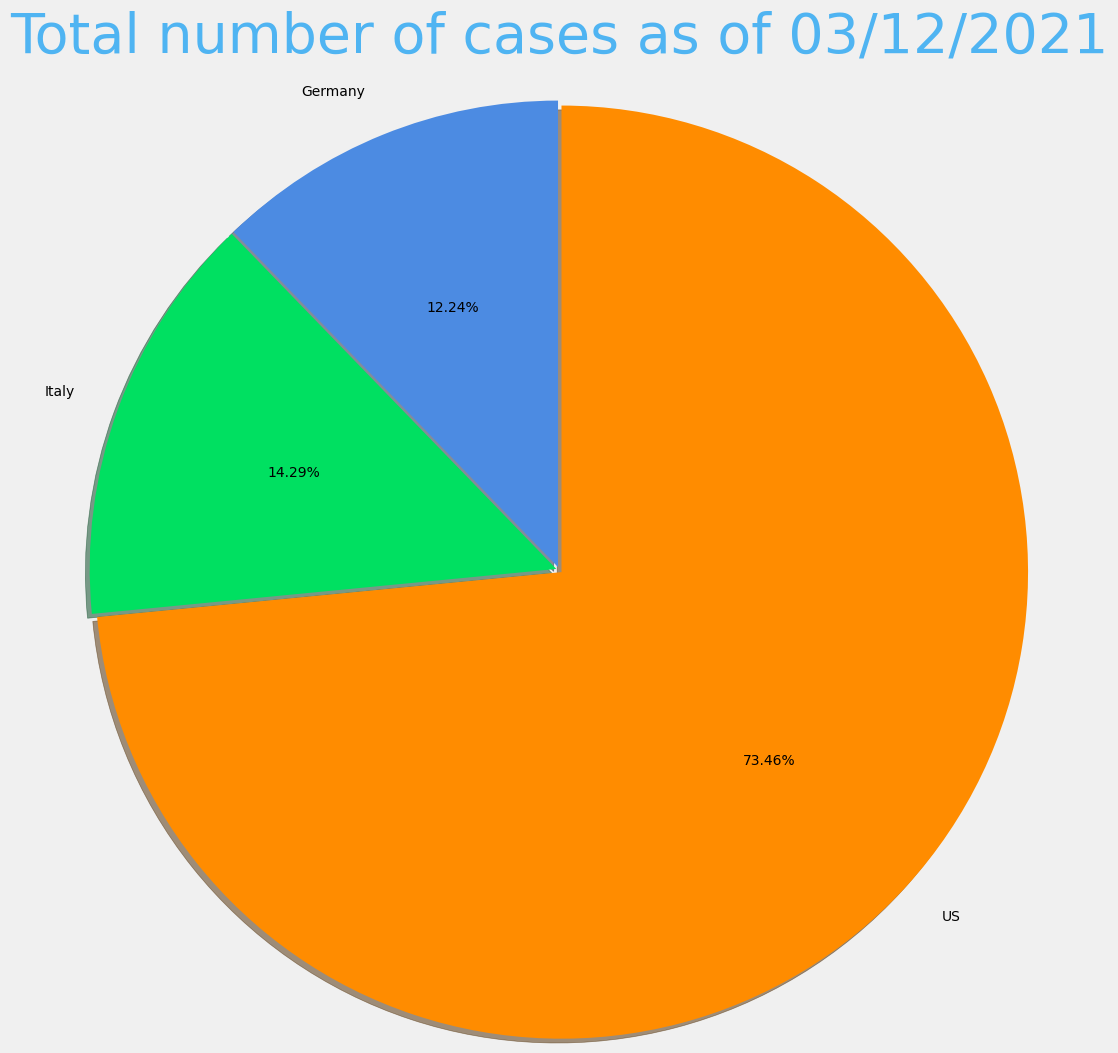

In [50]:
slices = [4969030, 5800684, 	29815728]
activities = ['Germany', 'Italy', 'US']

cols=['#4C8BE2','#00e061','#FF8C00']
exp = [0.02,0.02,0.02]

plt.pie(slices,labels=activities,
        textprops=dict(size=10,color='black'),
        radius=3,
        colors=cols,
        autopct='%2.2f%%',
        explode=exp,
        shadow=True,
        startangle=90)

plt.title('Total number of cases as of 03/12/2021\n\n\n\n\n',color='#4fb4f2',size=40)


In Section A, we created a dictionary that contains hex values for different countries. Storing this in a dictionary will allow us to easily call it later in a for-loop. We also assign the FiveThirtyEight style to add some general formatting, which we’ll heavily build upon.

In Section B, we create our first visualization using Pandas’ plot function. We use the colors parameter to assign the colors to different columns. We also use the set_major_formatter method to format values with separators for thousands.

In Section C, we create a for-loop that generates label text for the various countries. This for-loop gets each country’s name from the keys in the dictionary in the form of a list and iterates over this list. It places text containing the country’s name to the right of the last x-value (covid.index[-1] → the last date in the dataframe), at the current day’s y-value (which will always be equal to the max value of that column).

Finally, in Section D, we add a title, subtitle, and source information about the chart. We use variables again to position the data so as the graph updates these positions are updated dynamically!

Text(2020-01-23 00:00:00, -100000, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

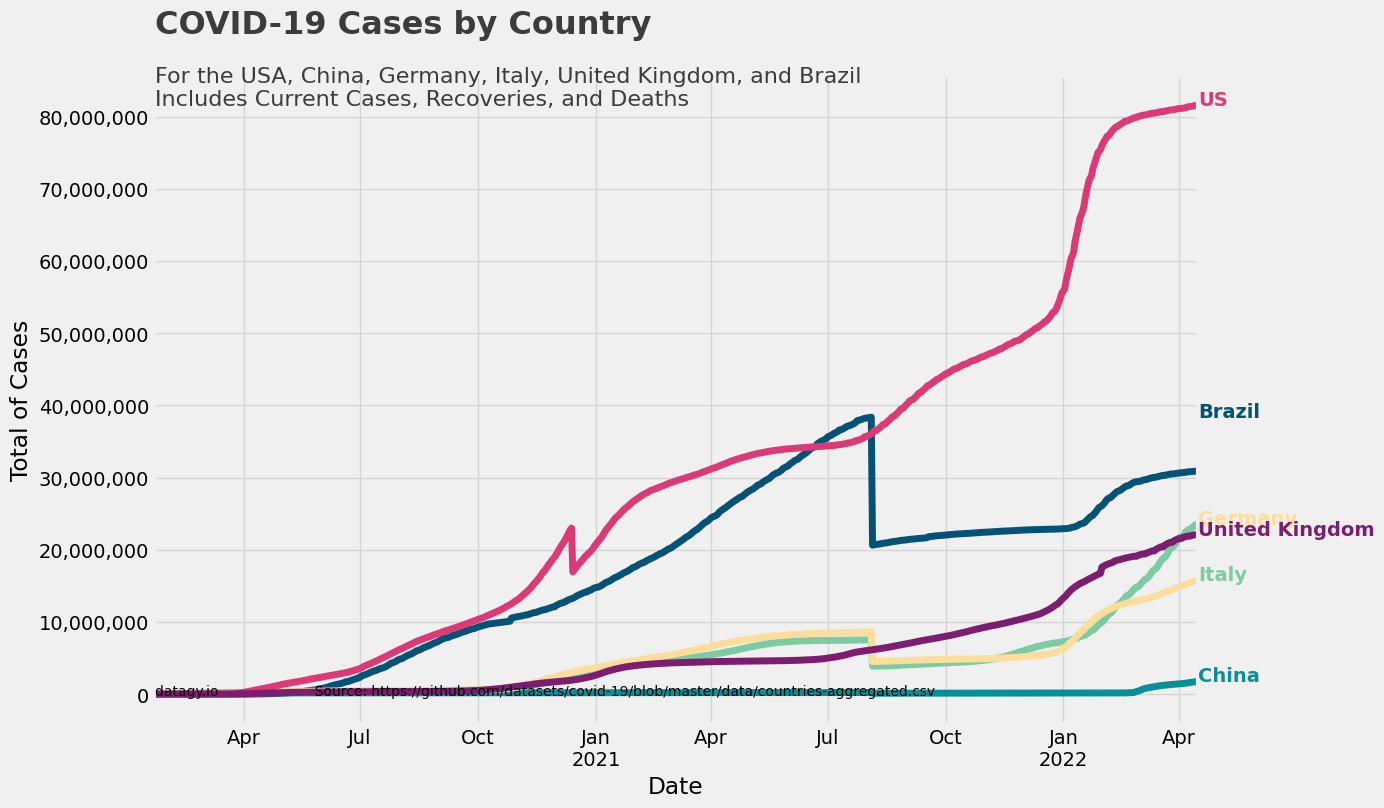

In [51]:
# Section A - Generating Colours and Style
colors = {'Brazil':'#045275', 'China':'#089099', 'Italy':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section B - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Total of Cases')

# Section C - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section D - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country\n\n", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, Italy, United Kingdom, and Brazil\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = covid.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

In [52]:
import plotly.graph_objs as po
import plotly.express as px

# Prepare data for Plotly
chartplot = po.Figure()

# Add traces for each country
for column in covid.columns:
    chartplot.add_trace(po.Scatter(x=covid.index, y=covid[column],mode='lines',name=column))

# Update layout
chartplot.update_layout(title='Covid Cases for Selected Countries',xaxis_title='Date',yaxis_title='Number of Covid Cases',hovermode='x unified')

# Show the plot
chartplot.show()

In [53]:
import plotly.express as px

# Convert DataFrame to long format for easy plotting
covid_long = covid.reset_index().melt(id_vars='Date', var_name='Country', value_name='Cases')

# Create an interactive histogram using Plotly Express
fig = px.histogram(covid_long, x='Cases', color='Country', facet_col='Country', nbins=20,
                   title='Distribution of Covid Cases for Selected Countries')

fig.update_layout(
    xaxis_title='Number of Covid Cases x 10e7',
    yaxis_title='Frequency'
)

fig.show()  # Display the interactive histogram
